In [1]:
"""
This notebook has code to show reconstruction loss statistics.
"""

'\nThis notebook has code to show reconstruction loss statistics.\n'

In [2]:
import json
import os
import sys
import numpy as np
sys.path.append(os.path.abspath("../.."))   # one level up from notebook/
from data.utils.dataloaders import get_imagenet_dataloader
import matplotlib.pyplot as plt
from data.utils.dataloaders import ReconstructionDataset_Heuristic



/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def prepare_reconstruction_dataset(reconst_loss_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/val_categorized/all_losses.json",
                                   LID_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/imageNet_LID_values/flextok_based/original_images/val/t_0.32/lid_0000_0329.json",
                                   best_LID_noise_level=[26,26,25,25,24,24,23,14,14],
                                   local_density_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/conditional/val",
                                   k_values = [1,2,4,8,16,32,64,128,256],
                                   lpips_variance_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/LPIPS_variance_reconstructions/val/reconst_"):
    
    """
    Read the reconstruction loss file, LID values for best noise levels, and local density information.
    Create and return a ReconstructionDataset_Heuristic instance.
    """
    if reconst_loss_file != None:
        # read reconstruction loss json file 
        with open(reconst_loss_file, 'r') as f:
            reconst_losses = json.load(f)
    else:
        reconst_losses = None

    if LID_file != None:
        # read LID values for best noise levels
        best_lids_per_k = {}
        for best_lid, k in zip(best_LID_noise_level, k_values):
            LID_JSON   = f"{LID_file}t_{best_lid}/lid_0000_3125.json"
            # Load LID values; we assume it's ordered so that index i corresponds to image i
            with open(LID_file, 'r') as f:
                lid_values = json.load(f)
            best_lids_per_k[k] = lid_values
    else:
        best_lids_per_k = None

    if local_density_file != None:
        # load densities
        density_dict = {}
        for k in k_values:
            with open(local_density_file, 'r') as f:
                current_densities = json.load(f)
            density_dict[k]=current_densities

        processed_density_dict = {}
        timestep_needed = [0,0,0,0,0,0,0,0,0]
        for idx, (key, value) in enumerate(density_dict.items()):
            processed_density_dict[key] = [sum(v[0][timestep_needed[idx]:]) for v in value]
    else:
        processed_density_dict = None

    if lpips_variance_file != None:
        # lpips variance information
        list_lpips_variances = {}
        k_values = [1,2,4,8,16,32,64,128,256]
        for k in k_values:
            with open(f"{lpips_variance_file}{k}.json") as f:
                k_variance = json.load(f)
                list_lpips_variances[k] = [v for inner in k_variance.values() for v in inner.values()]
    else:
        list_lpips_variances = None

    # create dataset
    ds = ReconstructionDataset_Heuristic(
        reconstruction_data=reconst_losses,  # or your processed list of dicts
        local_density_information=processed_density_dict, # [l[0] for l in density]
        lid_information=best_lids_per_k,
        error_key=["LPIPS"],
        lpips_variance_information=list_lpips_variances
    )

    return ds

In [4]:
# read json file 
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/val_categorized/all_losses.json', 'r') as f:
    reconst_losses = json.load(f)

In [5]:
# separate into different token counts
l1_losses_1 = []
lpips_losses_1 = []
dino_losses_1 = []
l1_losses_2 = []
lpips_losses_2 = []
dino_losses_2 = []
l1_losses_4 = []
lpips_losses_4 = []
dino_losses_4 = []
l1_losses_8 = []
lpips_losses_8 = []
dino_losses_8 = []
l1_losses_16 = []
lpips_losses_16 = []
dino_losses_16 = []
l1_losses_32 = []
lpips_losses_32 = []
dino_losses_32 = []
l1_losses_64 = []
lpips_losses_64 = []
dino_losses_64 = []
l1_losses_128 = []
lpips_losses_128 = []
dino_losses_128 = []
l1_losses_256 = []
lpips_losses_256 = []
dino_losses_256 = []
for item in reconst_losses:
    token_count = item['k_value']
    l1_loss = item['L1Loss']
    lpips_loss = item['LPIPS']
    
    if token_count == 1:
        l1_losses_1.append(l1_loss)
        lpips_losses_1.append(lpips_loss)
        dino_losses_1.append(item['DINOv2FeatureLoss'])
    elif token_count == 2:
        l1_losses_2.append(l1_loss)
        lpips_losses_2.append(lpips_loss)
        dino_losses_2.append(item['DINOv2FeatureLoss'])
    elif token_count == 4:
        l1_losses_4.append(l1_loss)
        lpips_losses_4.append(lpips_loss)
        dino_losses_4.append(item['DINOv2FeatureLoss'])
    elif token_count == 8:
        l1_losses_8.append(l1_loss)
        lpips_losses_8.append(lpips_loss)
        dino_losses_8.append(item['DINOv2FeatureLoss'])
    elif token_count == 16:
        l1_losses_16.append(l1_loss)
        lpips_losses_16.append(lpips_loss)
        dino_losses_16.append(item['DINOv2FeatureLoss'])
    elif token_count == 32:
        l1_losses_32.append(l1_loss)
        lpips_losses_32.append(lpips_loss)
        dino_losses_32.append(item['DINOv2FeatureLoss'])
    elif token_count == 64:
        l1_losses_64.append(l1_loss)
        lpips_losses_64.append(lpips_loss)
        dino_losses_64.append(item['DINOv2FeatureLoss'])
    elif token_count == 128:
        l1_losses_128.append(l1_loss)
        lpips_losses_128.append(lpips_loss)
        dino_losses_128.append(item['DINOv2FeatureLoss'])
    elif token_count == 256:
        l1_losses_256.append(l1_loss)
        lpips_losses_256.append(lpips_loss)
        dino_losses_256.append(item['DINOv2FeatureLoss'])

In [6]:
print(len(lpips_losses_1), len(lpips_losses_2), len(lpips_losses_4), len(lpips_losses_8),
                               len(lpips_losses_16), len(lpips_losses_32), len(lpips_losses_64),
                               len(lpips_losses_128), len(lpips_losses_256))

50000 50000 50000 50000 50000 50000 50000 50000 50000


In [7]:
# find the range for LPIPS loss
min_loss_LPIPS = min(min(lpips_losses_1), min(lpips_losses_2), min(lpips_losses_4), min(lpips_losses_8), min(lpips_losses_16), min(lpips_losses_32), min(lpips_losses_64), min(lpips_losses_128), min(lpips_losses_256))
max_loss_LPIPS = max(max(lpips_losses_1), max(lpips_losses_2), max(lpips_losses_4), max(lpips_losses_8), max(lpips_losses_16), max(lpips_losses_32), max(lpips_losses_64), max(lpips_losses_128), max(lpips_losses_256))

print("LPIPS Loss range:", min_loss_LPIPS, "to", max_loss_LPIPS)

# find the range for L1 loss
min_loss_L1 = min(min(l1_losses_1), min(l1_losses_2), min(l1_losses_4), min(l1_losses_8), min(l1_losses_16), min(l1_losses_32), min(l1_losses_64), min(l1_losses_128), min(l1_losses_256))
max_loss_L1 = max(max(l1_losses_1), max(l1_losses_2), max(l1_losses_4), max(l1_losses_8), max(l1_losses_16), max(l1_losses_32), max(l1_losses_64), max(l1_losses_128), max(l1_losses_256))

print("L1 Loss range:", min_loss_L1, "to", max_loss_L1)

# find the range for DINOv2FeatureLoss
min_loss_DINO = min(min(dino_losses_1), min(dino_losses_2), min(dino_losses_4), min(dino_losses_8), min(dino_losses_16), min(dino_losses_32), min(dino_losses_64), min(dino_losses_128), min(dino_losses_256))
max_loss_DINO = max(max(dino_losses_1), max(dino_losses_2), max(dino_losses_4), max(dino_losses_8), max(dino_losses_16), max(dino_losses_32), max(dino_losses_64), max(dino_losses_128), max(dino_losses_256))

print("DINOv2Feature Loss range:", min_loss_DINO, "to", max_loss_DINO)

LPIPS Loss range: 0.020792722702026367 to 1.0791053771972656
L1 Loss range: 0.004172969609498978 to 0.7537509799003601
DINOv2Feature Loss range: 0.010271608829498291 to 1.1576836109161377


In [8]:
# find the variance of losses across different token counts
lpips_losses_array = np.array([lpips_losses_1, lpips_losses_2, lpips_losses_4, lpips_losses_8,
                               lpips_losses_16, lpips_losses_32, lpips_losses_64,
                               lpips_losses_128, lpips_losses_256])
lpips_std = np.std(lpips_losses_array, axis=1)
lpips_mean = np.mean(lpips_losses_array, axis=1)

dino_losses_array = np.array([dino_losses_1, dino_losses_2, dino_losses_4, dino_losses_8,
                               dino_losses_16, dino_losses_32, dino_losses_64,
                               dino_losses_128, dino_losses_256])
dino_std = np.std(dino_losses_array, axis=1)
dino_mean = np.mean(dino_losses_array, axis=1)

l1_losses_array = np.array([l1_losses_1, l1_losses_2, l1_losses_4, l1_losses_8,
                               l1_losses_16, l1_losses_32, l1_losses_64,
                               l1_losses_128, l1_losses_256])
l1_std = np.std(l1_losses_array, axis=1)
l1_mean = np.mean(l1_losses_array, axis=1)

print("LPIPS Loss Variance across different token counts:")
for i, var in enumerate(lpips_std):
        print(f"k {i+1}: Std = {var:.3f}, Mean = {lpips_mean[i]:.3f}")
print("DINOv2 Feature Loss Variance across different token counts:")
for i, var in enumerate(dino_std):
        print(f"k {i+1}: Std = {var:.3f}, Mean = {dino_mean[i]:.3f}")
print("L1 Loss Variance across different token counts:")
for i, var in enumerate(l1_std):
        print(f"k {i+1}: Std = {var:.3f}, Mean = {l1_mean[i]:.3f}")

LPIPS Loss Variance across different token counts:
k 1: Std = 0.061, Mean = 0.664
k 2: Std = 0.066, Mean = 0.639
k 3: Std = 0.073, Mean = 0.581
k 4: Std = 0.076, Mean = 0.541
k 5: Std = 0.080, Mean = 0.504
k 6: Std = 0.081, Mean = 0.462
k 7: Std = 0.081, Mean = 0.426
k 8: Std = 0.079, Mean = 0.378
k 9: Std = 0.076, Mean = 0.325
DINOv2 Feature Loss Variance across different token counts:
k 1: Std = 0.270, Mean = 0.602
k 2: Std = 0.256, Mean = 0.524
k 3: Std = 0.250, Mean = 0.470
k 4: Std = 0.220, Mean = 0.379
k 5: Std = 0.198, Mean = 0.331
k 6: Std = 0.178, Mean = 0.286
k 7: Std = 0.164, Mean = 0.255
k 8: Std = 0.149, Mean = 0.227
k 9: Std = 0.128, Mean = 0.191
L1 Loss Variance across different token counts:
k 1: Std = 0.064, Mean = 0.264
k 2: Std = 0.060, Mean = 0.251
k 3: Std = 0.050, Mean = 0.192
k 4: Std = 0.050, Mean = 0.174
k 5: Std = 0.045, Mean = 0.148
k 6: Std = 0.041, Mean = 0.129
k 7: Std = 0.038, Mean = 0.113
k 8: Std = 0.034, Mean = 0.094
k 9: Std = 0.029, Mean = 0.077


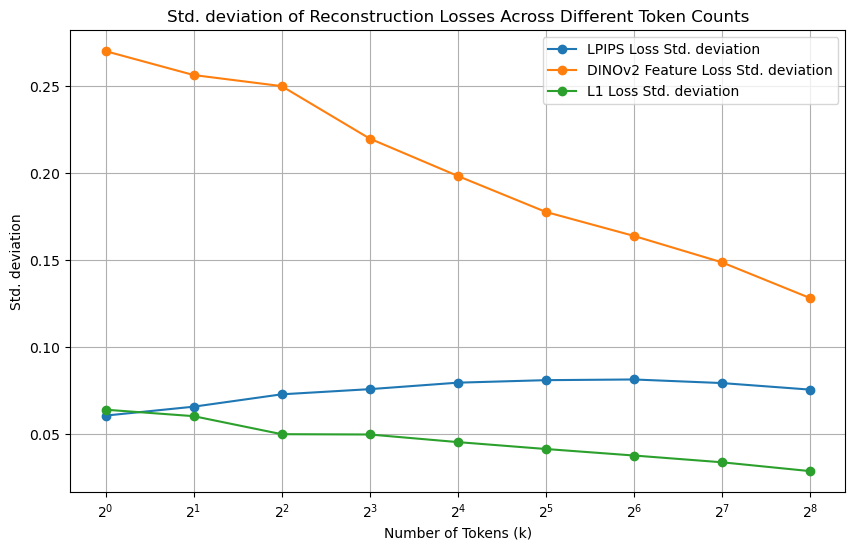

In [9]:
# plot the variances as k increases for each loss type
k_values = [1,2,4,8,16,32,64,128,256]
plt.figure(figsize=(10, 6))
plt.plot(k_values, lpips_std, marker='o', label='LPIPS Loss Std. deviation')
plt.plot(k_values, dino_std, marker='o', label='DINOv2 Feature Loss Std. deviation')
plt.plot(k_values, l1_std, marker='o', label='L1 Loss Std. deviation')
plt.xscale('log', base=2)
plt.xlabel('Number of Tokens (k)')
plt.ylabel('Std. deviation')
plt.title('Std. deviation of Reconstruction Losses Across Different Token Counts')
plt.legend()
plt.grid(True)
plt.show()

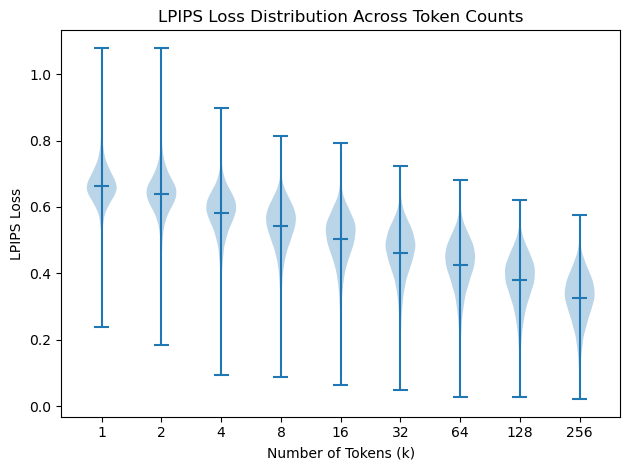

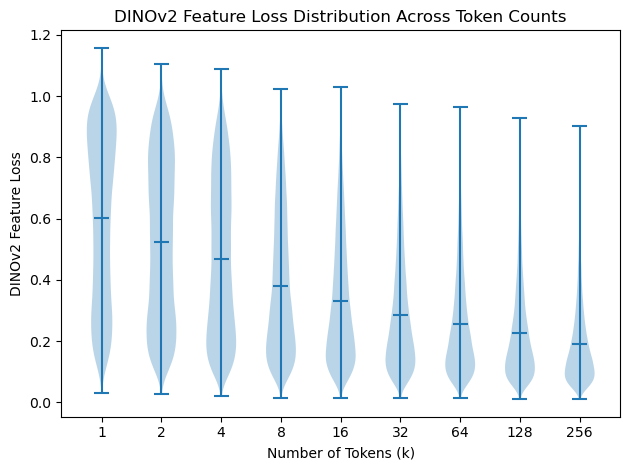

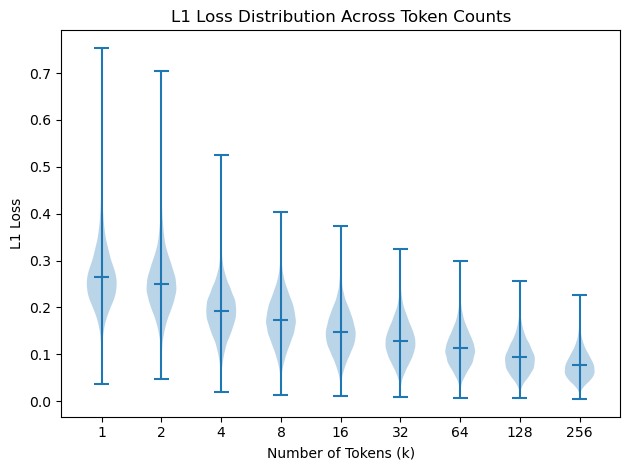

In [33]:
# plot viloin plots for each loss type across different token counts and show mean

plt.violinplot([lpips_losses_1, lpips_losses_2, lpips_losses_4, lpips_losses_8,
                lpips_losses_16, lpips_losses_32, lpips_losses_64,
                lpips_losses_128, lpips_losses_256], showmeans=True)

plt.title('LPIPS Loss Distribution Across Token Counts')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('LPIPS Loss')
plt.xticks(ticks=range(1,10), labels=[1,2,4,8,16,32,64,128,256])
plt.tight_layout()
plt.savefig("/BS/data_mani_compress/work/thesis/thesis/output/reconstruction_losses/loss_distribution_per_token_count_lpips.pdf")
plt.show()

plt.violinplot([dino_losses_1, dino_losses_2, dino_losses_4, dino_losses_8,
                dino_losses_16, dino_losses_32, dino_losses_64,
                dino_losses_128, dino_losses_256], showmeans=True)
plt.title('DINOv2 Feature Loss Distribution Across Token Counts')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('DINOv2 Feature Loss')
plt.xticks(ticks=range(1,10), labels=[1,2,4,8,16,32,64,128,256])
plt.tight_layout()
plt.savefig("/BS/data_mani_compress/work/thesis/thesis/output/reconstruction_losses/loss_distribution_per_token_count_dino.pdf")
plt.show()

plt.violinplot([l1_losses_1, l1_losses_2, l1_losses_4, l1_losses_8,
                l1_losses_16, l1_losses_32, l1_losses_64,
                l1_losses_128, l1_losses_256], showmeans=True)
plt.title('L1 Loss Distribution Across Token Counts')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('L1 Loss')
plt.xticks(ticks=range(1,10), labels=[1,2,4,8,16,32,64,128,256])
plt.tight_layout()
plt.savefig("/BS/data_mani_compress/work/thesis/thesis/output/reconstruction_losses/loss_distribution_per_token_l1_dino.pdf")
plt.show()

In [11]:
# ----------------------------------------------------
# 1. Extract LPIPS values ONLY to compute bin edges
# ----------------------------------------------------
lpips_vals = np.array([item['LPIPS'] for item in reconst_losses])

num_bins = 10
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(lpips_vals, quantiles)

# numerical safety
bin_edges[0] -= 1e-6
bin_edges[-1] += 1e-6

# ----------------------------------------------------
# 2. Prepare containers for k-values per bin
# ----------------------------------------------------
bin_k_values = [[] for _ in range(num_bins)]

# ----------------------------------------------------
# 3. Assign each item to its LPIPS bin
# ----------------------------------------------------
for item in reconst_losses:
    lpips_loss = item['LPIPS']
    k_value = item['k_value']

    bin_idx = np.searchsorted(bin_edges, lpips_loss, side='right') - 1
    bin_idx = min(max(bin_idx, 0), num_bins - 1)

    bin_k_values[bin_idx].append(k_value)

# ----------------------------------------------------
# 4. Report statistics (log-space is key!)
# ----------------------------------------------------
print("LPIPS quantile-binned token ambiguity:\n")

for i in range(num_bins):
    ks = np.array(bin_k_values[i])
    if len(ks) == 0:
        continue

    logk = (ks)

    print(
        f"Bin {i:02d} | "
        f"LPIPS [{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}] | "
        f"count={len(ks):6d} | "
        f"mean log2(k)={logk.mean():.2f} | "
        f"std log2(k)={logk.std(ddof=1):.2f} | "
        f"unique k={sorted(set(ks))}"
    )


LPIPS quantile-binned token ambiguity:

Bin 00 | LPIPS [0.021, 0.323] | count= 45000 | mean log2(k)=173.34 | std log2(k)=90.32 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 01 | LPIPS [0.323, 0.383] | count= 45000 | mean log2(k)=141.06 | std log2(k)=91.78 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 02 | LPIPS [0.383, 0.429] | count= 45000 | mean log2(k)=101.21 | std log2(k)=82.23 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 03 | LPIPS [0.429, 0.470] | count= 44999 | mean log2(k)=65.83 | std log2(k)=64.18 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 04 | LPIPS [0.470, 0.510] | count= 45001 | mean log2(k)=39.59 | std log2(k)=42.36 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 05 | LPIPS [0.510, 0.549] | count= 45000 | mean log2(k)=22.81 | std log2(k)=26.20 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 06 | LPIPS [0.549, 0.588] | count= 45000 | mean log2(k)=12.30 | std log2(k)=15.38 | unique k=[1, 2, 4, 8, 16, 32, 64, 128, 256]
Bin 07 | LPIPS [0.588, 0.625] | c

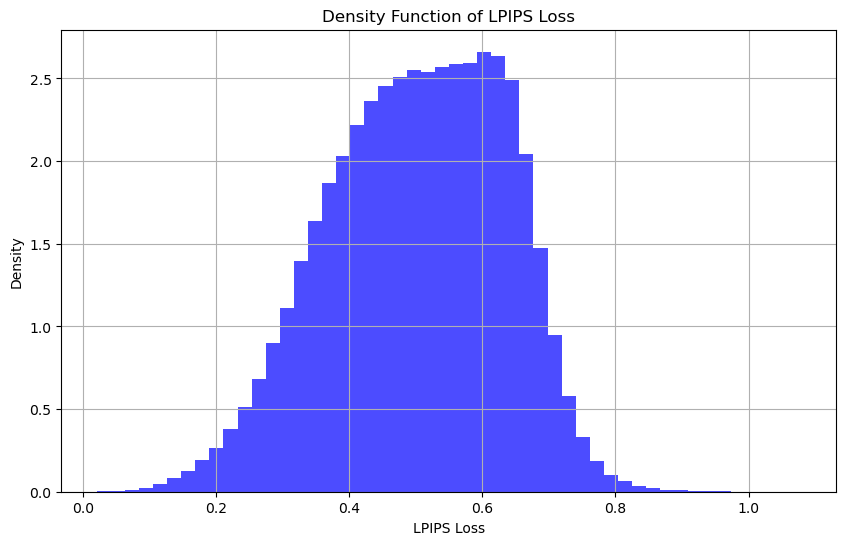

In [12]:
# plot density function for LPIPS loss
plt.figure(figsize=(10, 6))
plt.hist(lpips_vals, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Density Function of LPIPS Loss')
plt.xlabel('LPIPS Loss')
plt.ylabel('Density')
plt.grid(True)
plt.show()  

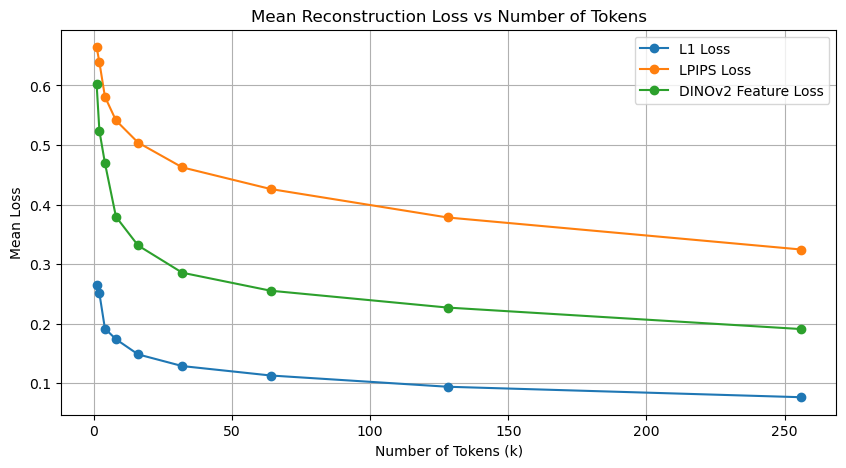

In [13]:
# plot the means for each k value
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
l1_means = [np.mean(l1_losses_1), np.mean(l1_losses_2), np.mean(l1_losses_4), np.mean(l1_losses_8), np.mean(l1_losses_16), np.mean(l1_losses_32), np.mean(l1_losses_64), np.mean(l1_losses_128), np.mean(l1_losses_256)]
lpips_means = [np.mean(lpips_losses_1), np.mean(lpips_losses_2), np.mean(lpips_losses_4), np.mean(lpips_losses_8), np.mean(lpips_losses_16), np.mean(lpips_losses_32), np.mean(lpips_losses_64), np.mean(lpips_losses_128), np.mean(lpips_losses_256)]  
dino_means = [np.mean(dino_losses_1), np.mean(dino_losses_2), np.mean(dino_losses_4), np.mean(dino_losses_8), np.mean(dino_losses_16), np.mean(dino_losses_32), np.mean(dino_losses_64), np.mean(dino_losses_128), np.mean(dino_losses_256)]

plt.figure(figsize=(10, 5))
plt.plot(k_values, l1_means, marker='o', label='L1 Loss')
plt.plot(k_values, lpips_means, marker='o', label='LPIPS Loss')
plt.plot(k_values, dino_means, marker='o', label='DINOv2 Feature Loss')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('Mean Loss')
plt.title('Mean Reconstruction Loss vs Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print(len(reconst_losses))
print(reconst_losses[0])

450000
{'image_id': 0, 'k_value': 1, 'L1Loss': 0.19351771473884583, 'LPIPS': 0.6646087765693665, 'LPIPS_layers': [0.11964087188243866, 0.14834865927696228, 0.11373482644557953, 0.1480303555727005, 0.13485409319400787], 'DINOv2FeatureLoss': 0.525488018989563}


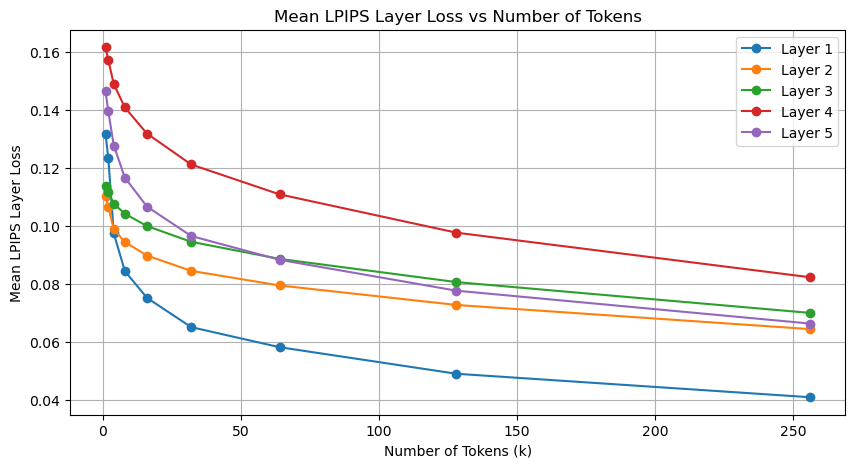

In [15]:
# LIPIS_layers has the loss for different layers of the LPIPS model. 
# they are stored as a list e.g. 'LPIPS_layers': [0.1586245596408844, 0.11117293685674667, 0.11170255392789841, 0.14455437660217285, 0.1303803026676178] 
# show how different layer losses change with token count
# we average over all images for each token count and plot the means for each layer
layer1_means = []
layer2_means = []
layer3_means = []
layer4_means = []
layer5_means = []
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
for k in k_values:
    layer1 = []
    layer2 = []
    layer3 = []
    layer4 = []
    layer5 = []
    for item in reconst_losses:
        if item['k_value'] == k:
            layer1.append(item['LPIPS_layers'][0])
            layer2.append(item['LPIPS_layers'][1])
            layer3.append(item['LPIPS_layers'][2])
            layer4.append(item['LPIPS_layers'][3])
            layer5.append(item['LPIPS_layers'][4])
    layer1_means.append(np.mean(layer1))
    layer2_means.append(np.mean(layer2))
    layer3_means.append(np.mean(layer3))
    layer4_means.append(np.mean(layer4))
    layer5_means.append(np.mean(layer5))
plt.figure(figsize=(10, 5))
plt.plot(k_values, layer1_means, marker='o', label='Layer 1')
plt.plot(k_values, layer2_means, marker='o', label='Layer 2')
plt.plot(k_values, layer3_means, marker='o', label='Layer 3')
plt.plot(k_values, layer4_means, marker='o', label='Layer 4')
plt.plot(k_values, layer5_means, marker='o', label='Layer 5')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('Mean LPIPS Layer Loss')
plt.title('Mean LPIPS Layer Loss vs Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()  

In [16]:
# see how the token count varies across a given range of LPIPS losses. We can use the bin edges computed above to group the LPIPS losses and then plot the distribution of token counts within each bin.
# we can also compute the mean and std of token counts within each bin to see if there is a clear relationship between LPIPS loss and token count. We can plot this as a box plot for each bin to visualize the distribution of token counts across different LPIPS loss ranges.

def find_bins(ds, k_values, num_bins=10, binning="quantile", normalize="prob"):
    """
    Find bin edges for reconstruction losses in the dataset.
    binning can be 'quantile' or 'uniform'.
    quantile: bins have equal number of samples
    uniform: bins have equal width
    """
    k_values = [int(k) for k in k_values]
    k_to_row = {k:i for i,k in enumerate(k_values)}

    losses = np.array([float(d["LPIPS"]) for d in ds], dtype=float)
    ks     = np.array([int(d["k_value"]) for d in ds], dtype=int)

    # bins on loss
    if binning == "quantile":
        q = np.linspace(0, 1, num_bins + 1)
        bin_edges = np.quantile(losses, q)
    elif binning == "uniform":
        bin_edges = np.linspace(losses.min(), losses.max(), num_bins + 1)
    else:
        raise ValueError("binning must be 'quantile' or 'uniform'")

    bin_edges[0]  -= 1e-9
    bin_edges[-1] += 1e-9

    # matrix [num_k, num_bins]
    token_prob_across_recon_loss = np.zeros((len(k_values), num_bins), dtype=float)
    for loss, k in zip(losses, ks):
        b = int(np.searchsorted(bin_edges, loss, side="right") - 1)
        b = max(0, min(b, num_bins - 1))
        token_prob_across_recon_loss[k_to_row[k], b] += 1
    
    raw_counts = token_prob_across_recon_loss.sum(axis=0)
    if normalize == "prob":
        col_sums = token_prob_across_recon_loss.sum(axis=0, keepdims=True)
        col_sums[col_sums == 0] = 1.0
        token_prob_across_recon_loss = token_prob_across_recon_loss / col_sums

    return bin_edges, token_prob_across_recon_loss, raw_counts

def plot_k_vs_loss_heatmap(bin_edges, M, raw_counts, k_values, num_bins=10, normalize="prob"):
    """
    Heatmap of token distribution across LPIPS bins.
      x-axis: LPIPS bins
      y-axis: k values
      color : count or probability

    normalize:
      - "count": show raw counts
      - "prob":  show per-bin probabilities (each column sums to 1)
    """
    

    # x labels
    x_labels = [f"[{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}]" for i in range(num_bins)]

    plt.figure(figsize=(12, 5))
    plt.imshow(M, aspect="auto", origin="lower")
    plt.colorbar(label=("Probability" if normalize=="prob" else "Count"))
    
    plt.xticks(range(num_bins), x_labels, rotation=45, ha="right")
    plt.yticks(range(len(k_values)), [str(k) for k in k_values])

    plt.plot(range(num_bins), raw_counts)
    plt.figure()
    plt.xlabel("Reconstruction loss (LPIPS) bins")
    plt.ylabel("Token count (k)")
    plt.title("P(k | loss bin)" if normalize=="prob" else "Counts of k per loss bin")
    plt.tight_layout()
    plt.show()


In [17]:
ds_val = prepare_reconstruction_dataset(reconst_loss_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/val_categorized/all_losses.json", 
                                        local_density_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/original_val/unconditional/combined.json",
                                        LID_file="/BS/data_mani_compress/work/thesis/thesis/data/datasets/imageNet_LID_values/flextok_based/original_images/val/t_0.32/lid_0000_0329.json")

In [18]:
def plot_k_vs_loss_heatmap(bin_edges, M, raw_counts, k_values, num_bins=10, normalize="prob"):
    """
    Heatmap of token distribution across LPIPS bins.
    X-axis: LPIPS bins
    Y-axis: k values
    Color : count or probability
    """

    x_labels = [f"[{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}]" for i in range(num_bins)]

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # --- Heatmap ---
    im = ax1.imshow(M, aspect="auto", origin="lower")
    cbar = fig.colorbar(im, ax=ax1)
    cbar.set_label("Probability" if normalize == "prob" else "Count")

    ax1.set_xticks(range(num_bins))
    ax1.set_xticklabels(x_labels, rotation=45, ha="right")
    ax1.set_yticks(range(len(k_values)))
    ax1.set_yticklabels([str(k) for k in k_values])

    ax1.set_xlabel("Reconstruction loss (LPIPS bins)")
    ax1.set_ylabel("Token count (k)")
    ax1.set_title("P(k | loss bin)" if normalize == "prob" else "Counts of k per loss bin")

    plt.tight_layout()
    plt.savefig("/BS/data_mani_compress/work/thesis/thesis/output/reconstruction_losses/token_distro_per_loss_bin.pdf")
    plt.show()


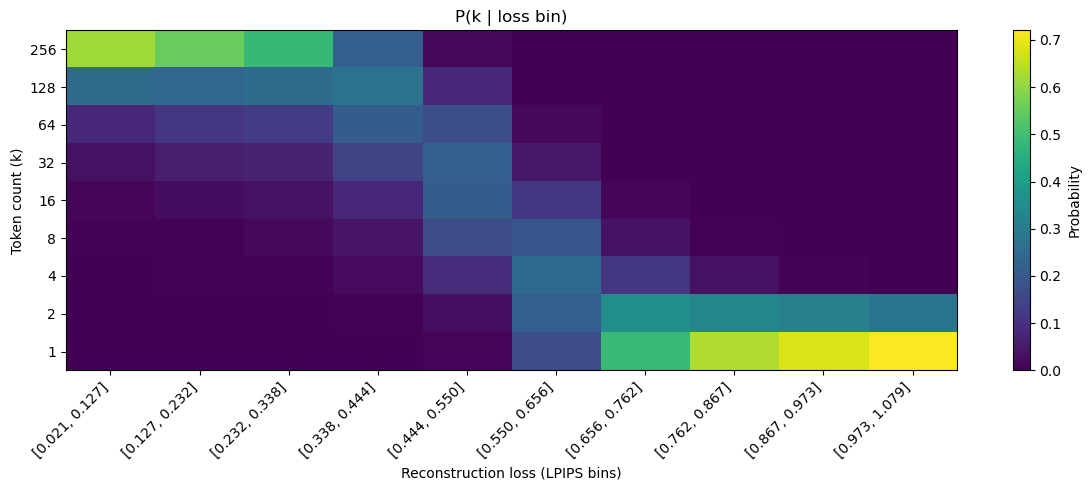

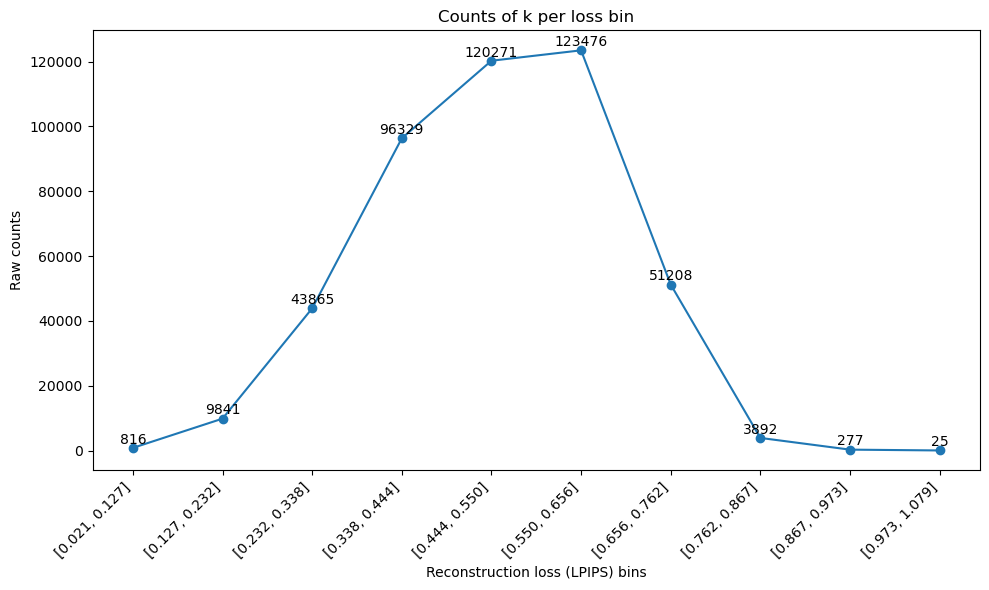

In [19]:
bin_edges_val, token_prob_across_recon_loss_val, raw_counts = find_bins(ds_val, k_values, num_bins=10, binning="uniform", normalize="prob")
plot_k_vs_loss_heatmap(bin_edges_val, token_prob_across_recon_loss_val, raw_counts, k_values, num_bins=10, normalize="prob")

plt.figure(figsize=(10, 6))

x = range(num_bins)

plt.plot(x, raw_counts, marker='o')
x_labels = [f"[{bin_edges_val[i]:.3f}, {bin_edges_val[i+1]:.3f}]" for i in range(num_bins)]
# Add text labels
for i, count in enumerate(raw_counts):
    plt.annotate(f"{count:.0f}", (x[i], count),
                 textcoords="offset points", xytext=(0, 3),
                 ha='center')

# Set custom bin labels
plt.xticks(x, x_labels, rotation=45, ha="right")

plt.xlabel("Reconstruction loss (LPIPS) bins")
plt.ylabel("Raw counts")
plt.title("Counts of k per loss bin")

plt.tight_layout()
plt.savefig("/BS/data_mani_compress/work/thesis/thesis/output/reconstruction_losses/counts_per_loss_bin.pdf")
plt.show()



In [20]:
import torch

imagenet = get_imagenet_dataloader(split="val_categorized", batch_size=4)


def denormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406], device=img_tensor.device).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225], device=img_tensor.device).view(3, 1, 1)
    return img_tensor * std + mean

In [21]:
# for different token counts get the mean and std of the reconstruction losses
# also get sample images for lowest and highest reconstruction losses
token_counts = [1, 2, 4, 8, 16, 32, 64, 128, 256]
for k in token_counts:
    l1_losses = []
    lpips_losses = []
    for item in reconst_losses:
        if item['k_value'] == k:
            l1_losses.append(item['L1Loss'])
            lpips_losses.append(item['LPIPS'])
    print(f"Token count: {k}")
    print(f"L1 Loss - Mean: {np.mean(l1_losses)}, Std: {np.std(l1_losses)}")
    print(f"LPIPS Loss - Mean: {np.mean(lpips_losses)}, Std: {np.std(lpips_losses)}")
    print()

Token count: 1
L1 Loss - Mean: 0.26415260842837396, Std: 0.06402954141557368
LPIPS Loss - Mean: 0.6641367216134071, Std: 0.0606361368456392

Token count: 2
L1 Loss - Mean: 0.25086901728235184, Std: 0.06031953837652996
LPIPS Loss - Mean: 0.6390045218294859, Std: 0.06575428365677023

Token count: 4
L1 Loss - Mean: 0.19181515247721226, Std: 0.04995714380126111
LPIPS Loss - Mean: 0.5810772976367176, Std: 0.07285952316004282

Token count: 8
L1 Loss - Mean: 0.1738834923509881, Std: 0.049776425905342904
LPIPS Loss - Mean: 0.5412031808558107, Std: 0.07582910672978783

Token count: 16
L1 Loss - Mean: 0.14847262968739494, Std: 0.045409405910567906
LPIPS Loss - Mean: 0.5040336578929424, Std: 0.07955327255858449

Token count: 32
L1 Loss - Mean: 0.12884550218829885, Std: 0.04143912950631941
LPIPS Loss - Mean: 0.4624336672103405, Std: 0.0809970216574086

Token count: 64
L1 Loss - Mean: 0.1130095782360062, Std: 0.03770240007995858
LPIPS Loss - Mean: 0.4260499442347512, Std: 0.08139379878807383

Token

In [22]:
# for fixed token count, there are different lists lpips_losses_1, lpips_losses_2, ...
# also, for fixed token count, different images have different reconstruction losses
# we can get the images with lowest and highest reconstruction losses for each token count
# and visualize them. 
lpips_losses_1_sorted_indices = np.argsort(lpips_losses_1)
lowest_indices_1 = lpips_losses_1_sorted_indices[:5]
mid_indices_1 = lpips_losses_1_sorted_indices[len(lpips_losses_1)//2 - 2: len(lpips_losses_1)//2 + 3]
highest_indices_1 = lpips_losses_1_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_2_sorted_indices = np.argsort(lpips_losses_2)
lowest_indices_2 = lpips_losses_2_sorted_indices[:5]
mid_indices_2 = lpips_losses_2_sorted_indices[len(lpips_losses_2)//2 - 2: len(lpips_losses_2)//2 + 3]
highest_indices_2 = lpips_losses_2_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_4_sorted_indices = np.argsort(lpips_losses_4)
lowest_indices_4 = lpips_losses_4_sorted_indices[:5]
mid_indices_4 = lpips_losses_4_sorted_indices[len(lpips_losses_4)//2 - 2: len(lpips_losses_4)//2 + 3]
highest_indices_4 = lpips_losses_4_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_8_sorted_indices = np.argsort(lpips_losses_8)
lowest_indices_8 = lpips_losses_8_sorted_indices[:5]
mid_indices_8 = lpips_losses_8_sorted_indices[len(lpips_losses_8)//2 - 2: len(lpips_losses_8)//2 + 3]
highest_indices_8 = lpips_losses_8_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_16_sorted_indices = np.argsort(lpips_losses_16)
lowest_indices_16 = lpips_losses_16_sorted_indices[:5]
mid_indices_16 = lpips_losses_16_sorted_indices[len(lpips_losses_16)//2 - 2: len(lpips_losses_16)//2 + 3]
highest_indices_16 = lpips_losses_16_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_32_sorted_indices = np.argsort(lpips_losses_32)
lowest_indices_32 = lpips_losses_32_sorted_indices[:5]
mid_indices_32 = lpips_losses_32_sorted_indices[len(lpips_losses_32)//2 - 2: len(lpips_losses_32)//2 + 3]
highest_indices_32 = lpips_losses_32_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_64_sorted_indices = np.argsort(lpips_losses_64)
lowest_indices_64 = lpips_losses_64_sorted_indices[:5]
mid_indices_64 = lpips_losses_64_sorted_indices[len(lpips_losses_64)//2 - 2: len(lpips_losses_64)//2 + 3]
highest_indices_64 = lpips_losses_64_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_128_sorted_indices = np.argsort(lpips_losses_128)
lowest_indices_128 = lpips_losses_128_sorted_indices[:5]
mid_indices_128 = lpips_losses_128_sorted_indices[len(lpips_losses_128)//2 - 2: len(lpips_losses_128)//2 + 3]
highest_indices_128 = lpips_losses_128_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_256_sorted_indices = np.argsort(lpips_losses_256)
lowest_indices_256 = lpips_losses_256_sorted_indices[:5]
mid_indices_256 = lpips_losses_256_sorted_indices[len(lpips_losses_256)//2 - 2: len(lpips_losses_256)//2 + 3]
highest_indices_256 = lpips_losses_256_sorted_indices[-5:][::-1]  # top 5 in descending order

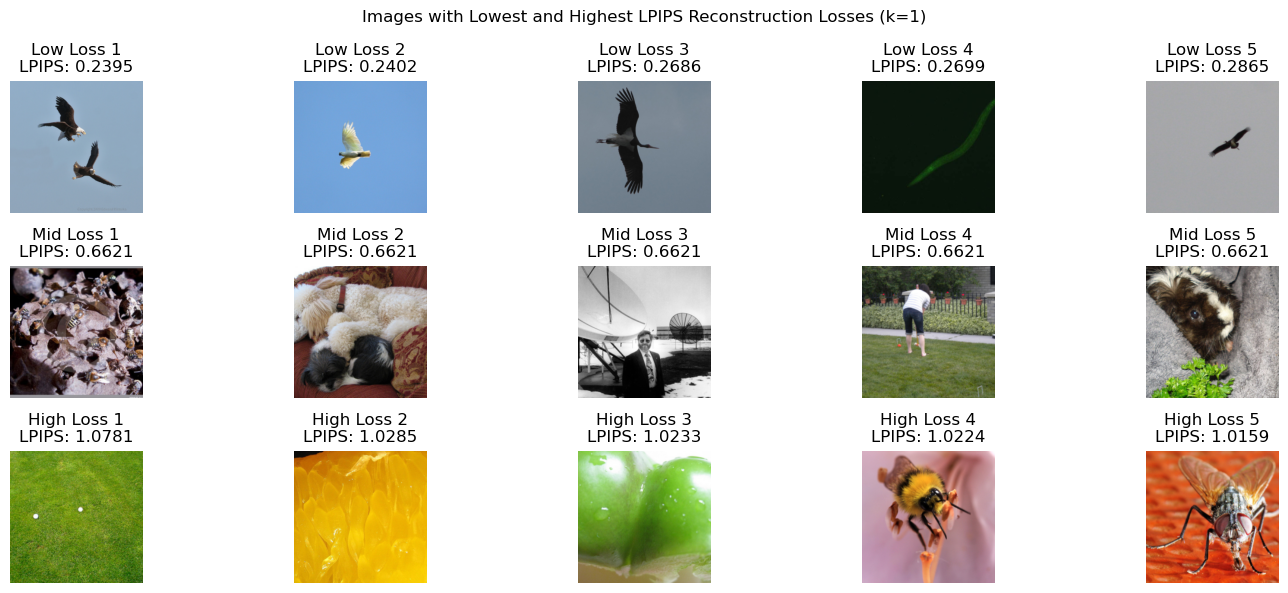

In [23]:
# plot images with lowest and highest reconstruction losses for token count of 1
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[1, i].axis('off')

for i, idx in enumerate(highest_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[2, i].axis('off')

plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=1)")
plt.tight_layout()
plt.show()

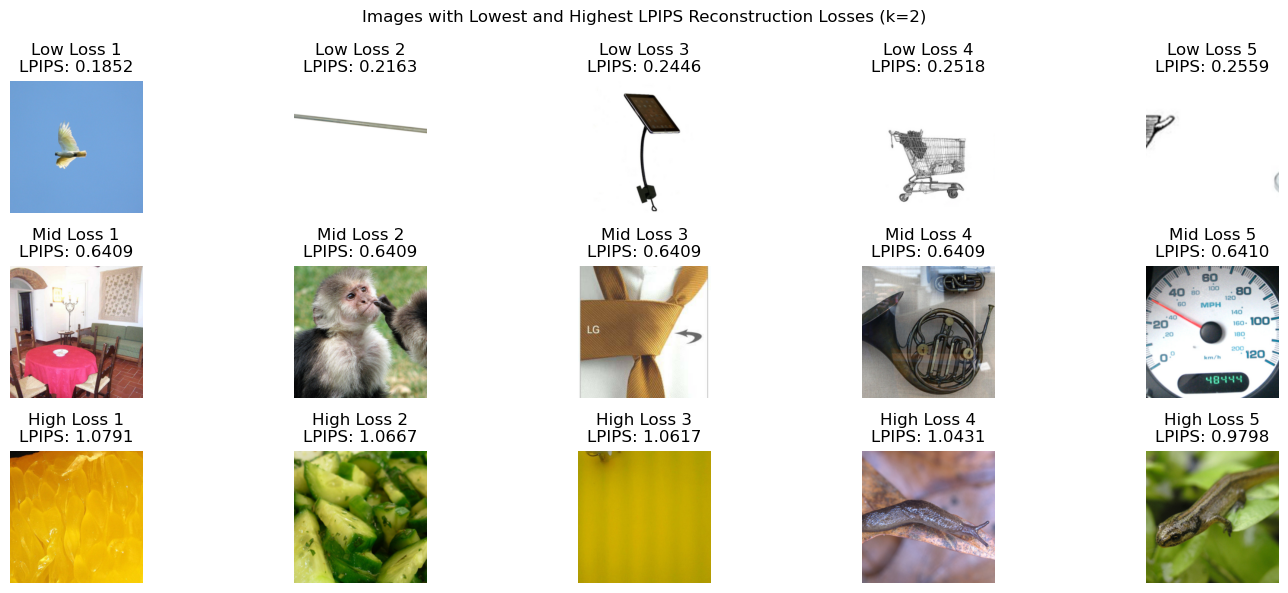

In [24]:
# plot images with lowest and highest reconstruction losses for token count of 2
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=2)")
plt.tight_layout()
plt.show()

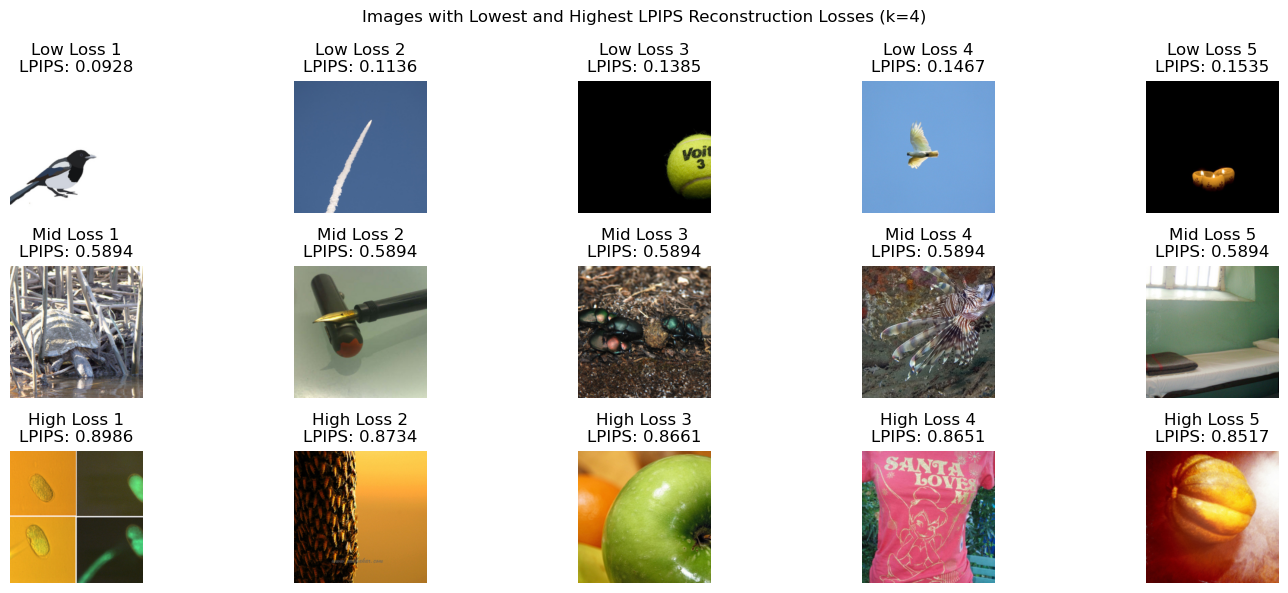

In [25]:
# plot images with lowest and highest reconstruction losses for token count of 4
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=4)")
plt.tight_layout()
plt.show()

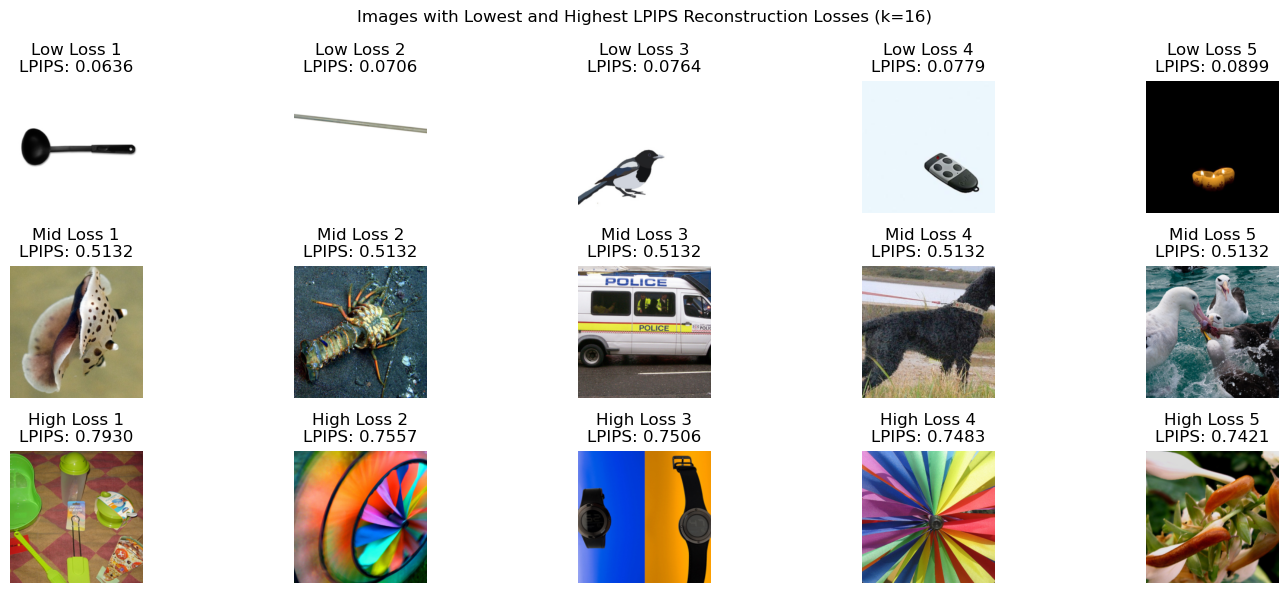

In [26]:
# plot images with lowest and highest reconstruction losses for token count of 16
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=16)")
plt.tight_layout()
plt.show()

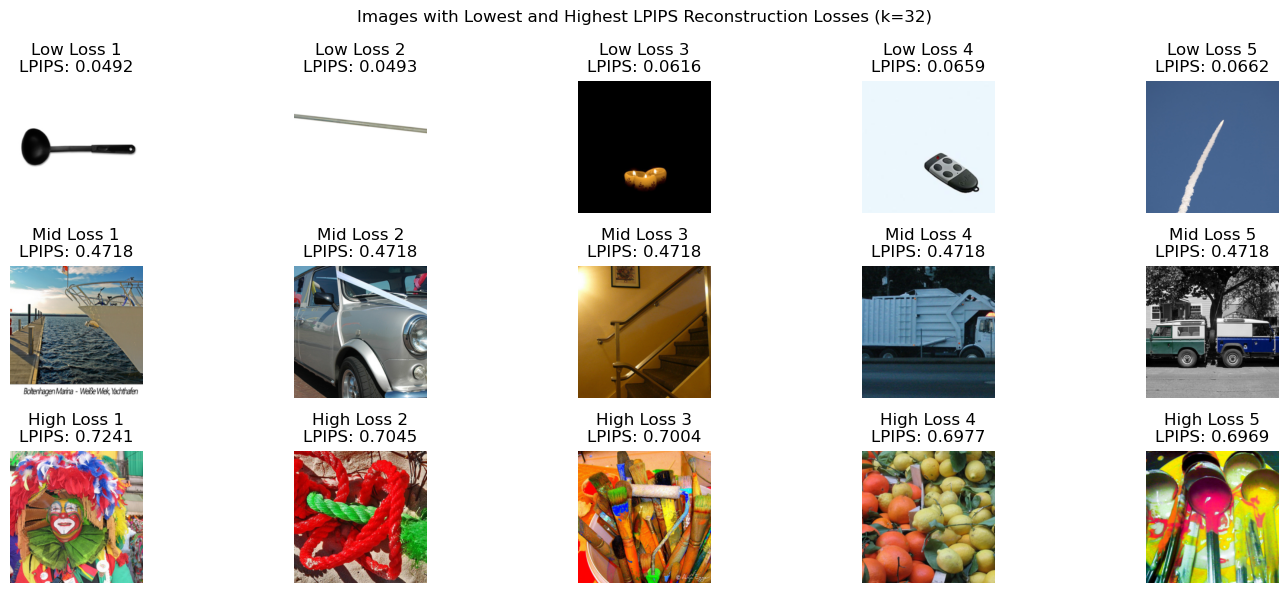

In [27]:
# plot images with lowest and highest reconstruction losses for token count of 32
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=32)")
plt.tight_layout()
plt.show()

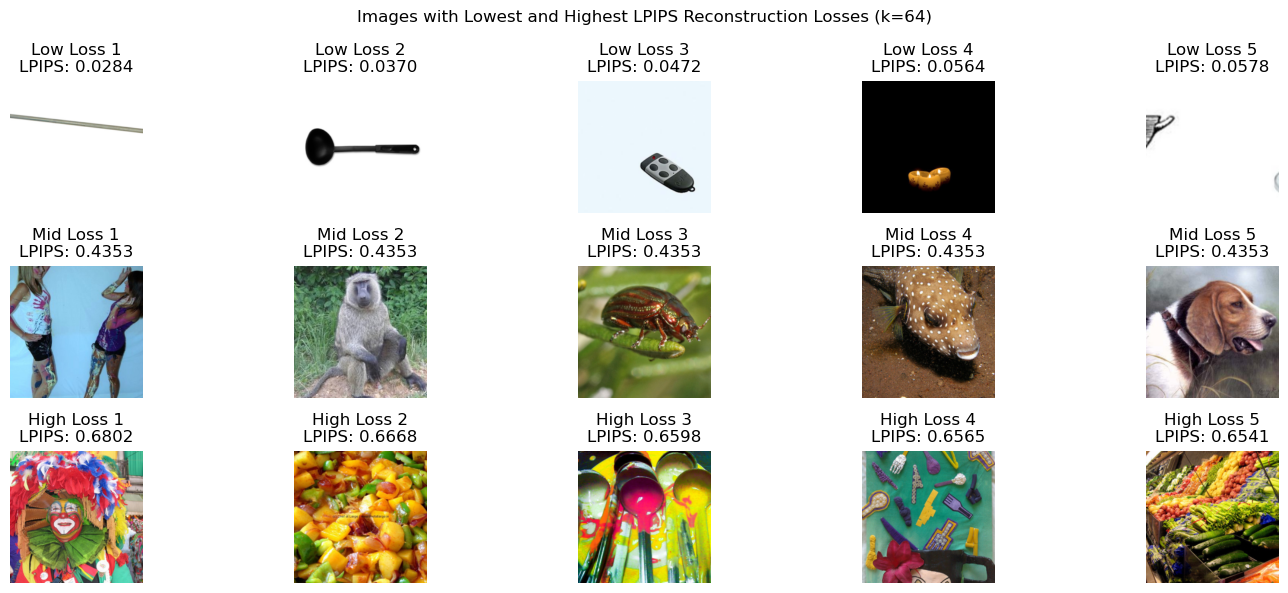

In [28]:
# plot images with lowest and highest reconstruction losses for token count of 64
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=64)")
plt.tight_layout()
plt.show()

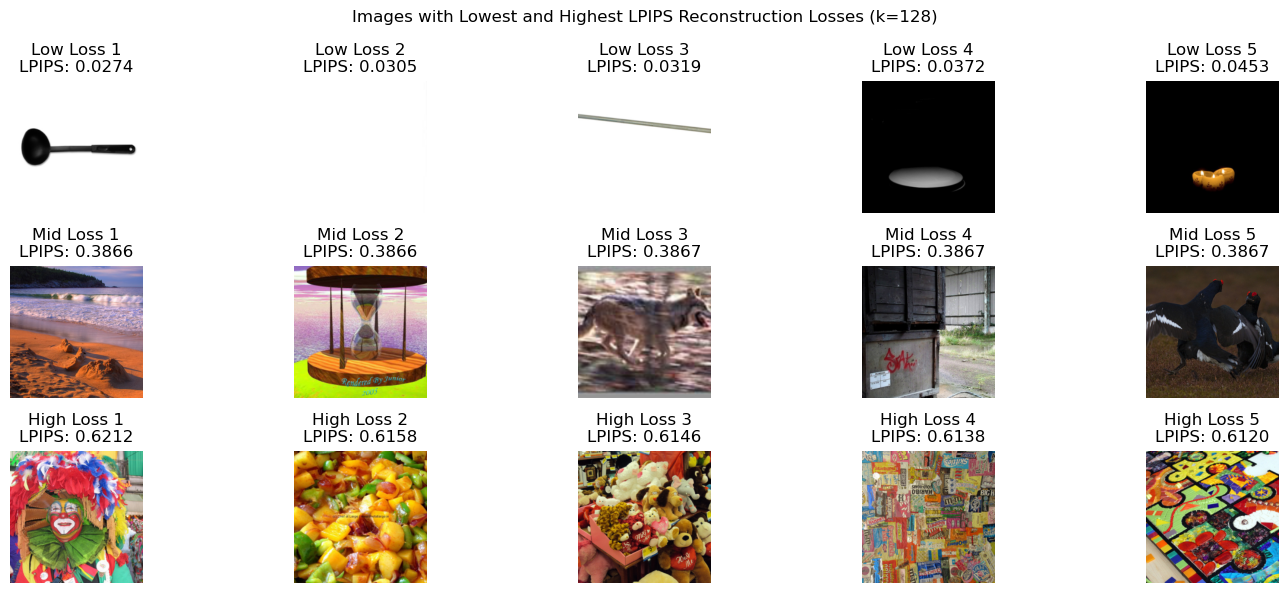

In [29]:
# plot images with lowest and highest reconstruction losses for token count of 128
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=128)")
plt.tight_layout()
plt.show()

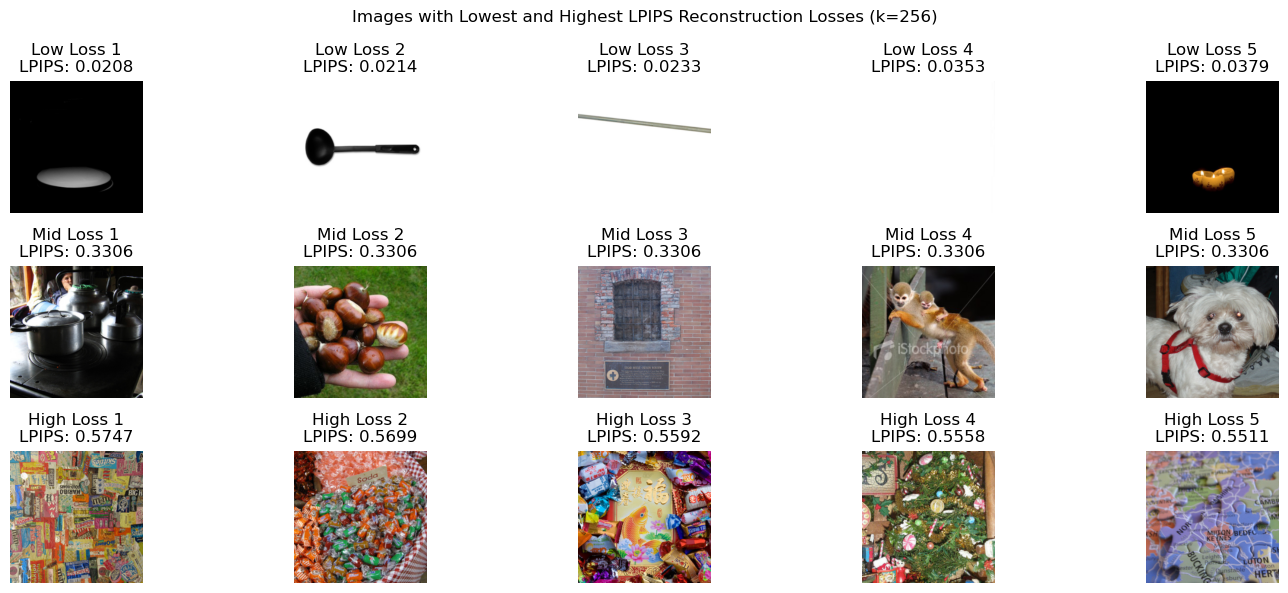

In [30]:
# plot images with lowest and highest reconstruction losses for token count of 256
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[2, i].axis('off')   
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=256)")
plt.tight_layout()
plt.show()